In [5]:
#pip install pandas-datareader
#pip insAtall keras
#!pip install tensorflow

     |████████████████████████████████| 107 kB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import array
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [3]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 6, 30)

In [4]:
axisgold = web.DataReader("AXISGOLD.NS", 'yahoo', start, end)
bslgoldetf = web.DataReader("BSLGOLDETF.NS", 'yahoo', start, end)
#cangold = web.DataReader("CANGOLD.BO", 'yahoo', start, end)
#hfcmgetf = web.DataReader("HFCMFGETF.BO", 'yahoo', start, end)
#ipgetf = web.DataReader("IPGETF.BO", 'yahoo', start, end)
idbigold = web.DataReader("IDBIGOLD.NS", 'yahoo', start, end)
kotakgold = web.DataReader("KOTAKGOLD.NS", 'yahoo', start, end)
qgoldhalf = web.DataReader("QGOLDHALF.NS", 'yahoo', start, end)
#relgold = web.DataReader("RELGOLD.BO", 'yahoo', start, end)
#religarego = web.DataReader("RELIGAREGO.BO", 'yahoo', start, end)
#setfgold = web.DataReader("SETFGOLD.NS", 'yahoo', start, end)
goldshare = web.DataReader("GOLDSHARE.NS", 'yahoo', start, end)
goldbees = web.DataReader("GOLDBEES.NS", 'yahoo', start, end)

In [5]:
axisgold.to_csv('AXISGOLD.csv')
bslgoldetf.to_csv('BSLGOLDETF.csv')
idbigold.to_csv('IDBIGOLD.csv')
kotakgold.to_csv('KOTAKGOLD.csv')
qgoldhalf.to_csv('QGOLDHALF.csv')
#setfgold.to_csv('SETFGOLD.csv')
goldshare.to_csv('GOLDSHARE.csv')
goldbees.to_csv('GOLDBEES.csv')

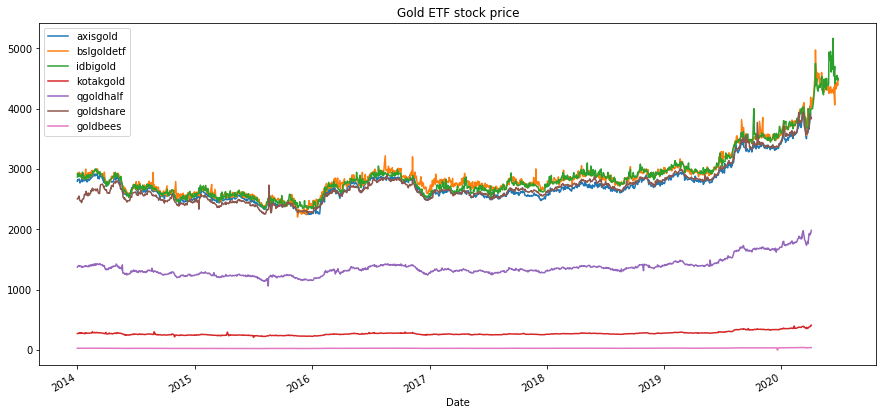

In [6]:
axisgold['Open'].plot(label = 'axisgold', figsize= (15,7))
bslgoldetf['Open'].plot(label = 'bslgoldetf')
idbigold['Open'].plot(label = 'idbigold')
kotakgold['Open'].plot(label = 'kotakgold')
qgoldhalf['Open'].plot(label = 'qgoldhalf')
goldshare['Open'].plot(label = 'goldshare')
goldbees['Open'].plot(label = 'goldbees')
plt.title('Gold ETF stock price')
plt.legend()

In [7]:
#We are going to predict the price of one Gold ETF below. Similarly all other predictions can also be made. Let us chose Axisgold ETF

In [8]:
import numpy as np
import pandas as pd
import json

data = pd.read_csv('AXISGOLD.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))

         Date         High          Low         Open        Close  Volume  \
0  2014-01-01  2827.000000  2786.649902  2795.000000  2823.899902   108.0   
1  2014-01-02  2823.899902  2766.500000  2823.899902  2792.949951   262.0   
2  2014-01-03  2830.000000  2800.149902  2819.899902  2806.550049   124.0   
3  2014-01-06  2830.000000  2791.149902  2830.000000  2824.149902   293.0   
4  2014-01-07  2831.600098  2797.149902  2831.600098  2815.000000   322.0   

     Adj Close  
0  2823.899902  
1  2792.949951  
2  2806.550049  
3  2824.149902  
4  2815.000000  


Open   --- mean : 2731.9523660168975   	 Std:  298.14851148276347   	 Max:  4044.199951171875   	 Min:  2245.050048828125
High   --- mean : 2753.576266509314   	 Std:  301.96097404535266   	 Max:  4116.89990234375   	 Min:  2255.25
Low    --- mean : 2711.799835861156   	 Std:  292.5524522290526   	 Max:  3837.85009765625   	 Min:  2230.0
Close  --- mean : 2729.691128709029   	 Std:  296.6061704634843   	 Max:  3958.550048828125  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1535 non-null   object 
 1   High       1535 non-null   float64
 2   Low        1535 non-null   float64
 3   Open       1535 non-null   float64
 4   Close      1535 non-null   float64
 5   Volume     1535 non-null   float64
 6   Adj Close  1535 non-null   float64
dtypes: float64(6), object(1)
memory usage: 84.1+ KB


In [10]:
print("Dataframe contains Data from from " + str(data['Date'].min()) + " to " + str(data['Date'].max()))
data.head()

Dataframe contains Data from from 2014-01-01 to 2020-04-03


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-01,2827.000000,2786.649902,2795.000000,2823.899902,108.0,2823.899902
1,2014-01-02,2823.899902,2766.500000,2823.899902,2792.949951,262.0,2792.949951
2,2014-01-03,2830.000000,2800.149902,2819.899902,2806.550049,124.0,2806.550049
3,2014-01-06,2830.000000,2791.149902,2830.000000,2824.149902,293.0,2824.149902
4,2014-01-07,2831.600098,2797.149902,2831.600098,2815.000000,322.0,2815.000000


In [11]:
df = data.dropna()
df.shape

(1535, 7)

In [12]:
# Select Adjusted close data
df = df[['Adj Close']]
print(df.shape)
df.head(10)

(1535, 1)


,Adj Close
0,2823.899902
1,2792.949951
2,2806.550049
3,2824.149902
4,2815.000000
5,2789.949951
6,2790.449951
7,2813.850098
8,2806.149902
9,2805.649902


<Figure size 864x432 with 0 Axes>

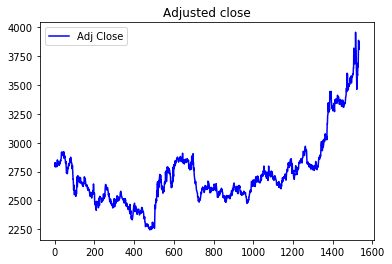

In [13]:
# display the data 
plt.figure(figsize=(12,6))
# all data points
df.plot(title='Adjusted close', color='blue') 
plt.show()

In [14]:
#Preprocessing the data by scaling
#minmaxscaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#scaler = MinMaxScalar(feature_range=(0,1))
#df = minmaxscaler.fit_transform(df)
#print(df)

In [15]:
#Create a variable to predict x days into the future
future_days = 380
#Create a new columns (target) shifted 'x' days up
df['Prediction'] = df[['Adj Close']].shift(-future_days)
df.tail(4)

,Adj Close,Prediction
1531,3888.699951,NaN
1532,3852.800049,NaN
1533,3807.850098,NaN
1534,3876.100098,NaN


In [16]:
#Create feature dataset (x), convert to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[2823.89990234]
 [2792.94995117]
 [2806.55004883]
 ...
 [2698.89990234]
 [2686.10009766]
 [2701.14990234]]


In [17]:
#Create a target data set (y) and convert to numpy array to get all target values except last x data points
y = np.array(df['Prediction'])[:-future_days]
print(y)

[2381.19995117 2390.         2389.64990234 ... 3852.80004883 3807.85009766
 3876.10009766]


In [18]:
#Split data 80% training 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [19]:
#Create models
#Create decision tree model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create linear decision model
lr = LinearRegression().fit(x_train, y_train)

In [20]:
#Get last x fows of future
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[2658.10009766],
       [2646.80004883],
       [2644.5       ],
       [2630.10009766],
       [2614.94995117],
       [2615.64990234],
       [2594.89990234],
       [2581.75      ],
       [2564.94995117],
       [2584.35009766],
       [2582.75      ],
       [2575.55004883],
       [2571.25      ],
       [2601.05004883],
       [2612.75      ],
       [2600.80004883],
       [2609.        ],
       [2608.        ],
       [2593.14990234],
       [2600.        ],
       [2598.        ],
       [2586.19995117],
       [2595.        ],
       [2604.5       ],
       [2594.        ],
       [2587.10009766],
       [2590.        ],
       [2623.30004883],
       [2641.39990234],
       [2634.14990234],
       [2635.5       ],
       [2625.19995117],
       [2605.        ],
       [2620.10009766],
       [2596.05004883],
       [2608.75      ],
       [2584.10009766],
       [2611.05004883],
       [2644.89990234],
       [2627.        ],
       [2601.30004883],
       [2581.5  

In [21]:
#Show tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

#Show model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[2695.05004883 2708.         2707.         2705.         2710.55004883
 2725.         2728.85009766 2772.75       3075.89990234 2678.10009766
 2700.         2677.10009766 2818.05004883 2738.10009766 2749.05004883
 2750.85009766 2749.10009766 3281.84997559 2752.         2643.99003906
 2790.         2824.         2719.07495117 2810.80004883 2810.
 2762.84997559 2752.22503662 2810.         3593.89990234 2812.14990234
 2800.10009766 2823.         2851.75       2849.80004883 2857.89990234
 2858.64990234 2845.19995117 2835.75       2710.         2709.
 2734.14990234 2819.75       2810.         2768.         2750.
 2749.35009766 2759.         2858.19995117 2862.65002441 2708.89990234
 2899.30004883 2690.         2682.14990234 2705.64990234 2858.92504883
 2720.         2768.         2753.30004883 2682.74991862 2800.
 2784.5        2767.55004883 2525.94995117 2750.         2755.
 2723.         2762.84997559 2630.         2754.         2760.
 2701.19995117 2783.07507324 2802.         2772.649902

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


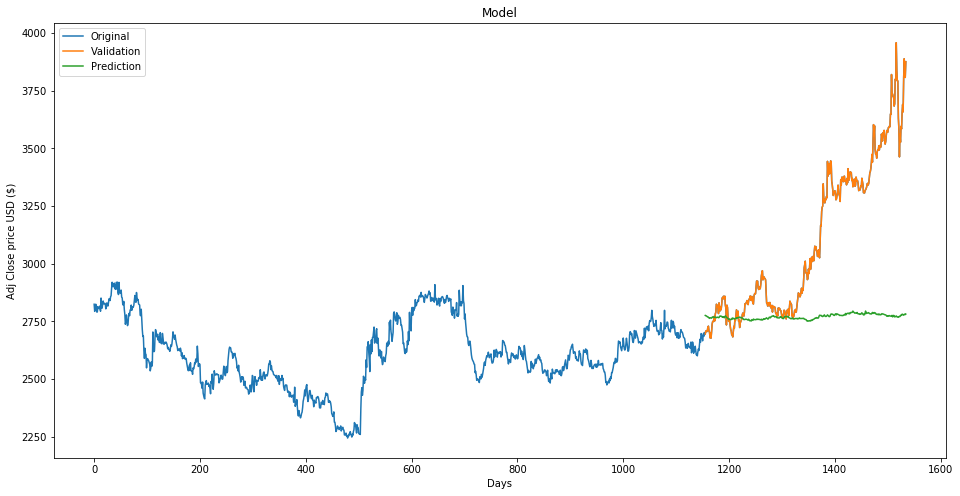

In [22]:
#Visualize data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close price USD ($)')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Original','Validation', 'Prediction'])
plt.show()

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


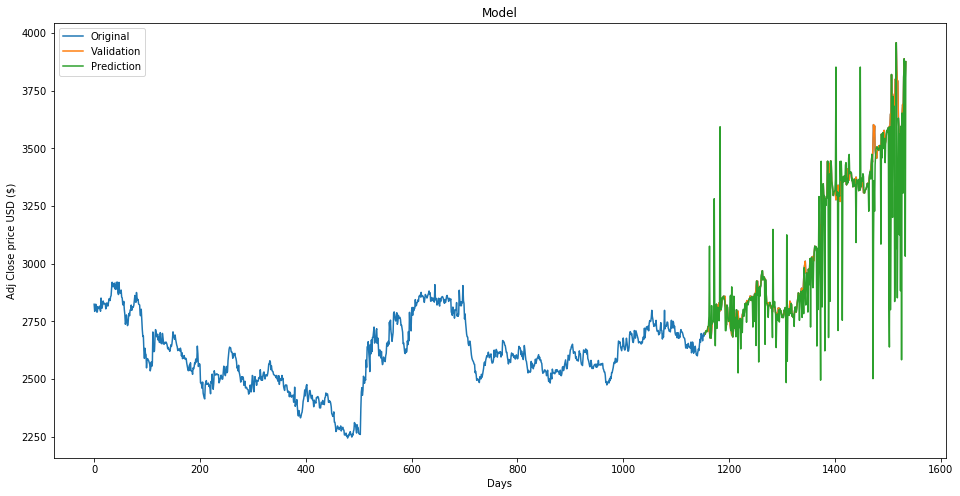

In [23]:
#Visualize data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Adj Close price USD ($)')
plt.plot(df['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Original','Validation', 'Prediction'])
plt.show()

In [40]:
#Modeling uing LSTM model
import numpy


In [41]:
data = pd.read_csv('AXISGOLD.csv')

In [45]:
# Select Adjusted close data
data = data[['Adj Close']]
print(data.shape)
data.head(4)

(1535, 1)


,Adj Close
0,2823.899902
1,2792.949951
2,2806.550049
3,2824.149902


In [47]:
#Split data 80% training 20% testing

training_size=int(len(data)*0.8)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [48]:
training_size,test_size

(1228, 307)

In [50]:
train_data

,Adj Close
0,2823.899902
1,2792.949951
2,2806.550049
3,2824.149902
4,2815.000000
...,...
1223,2754.000000
1224,2760.000000
1225,2779.000000
1226,2785.800049


In [51]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [55]:
#reshape into X=t,t+1,t+2,t+3 and Y=t+4
#time_step = 1
#X_train, y_train = create_dataset(train_data, time_step)
#X_test, ytest = create_dataset(test_data, time_step)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
print(x_train.shape), print(y_train.shape)

(924, 1)
(924,)


(None, None)

In [60]:
print(x_test.shape), print(y_test.shape)


(231, 1)
(231,)


(None, None)

In [67]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)

In [72]:
x_train.shape, x_test.shape

((924, 1, 1), (231, 1, 1))

In [63]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [91]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

ValueError: Shape must be at least rank 3 but is rank 2 for '{{node BiasAdd}} = BiasAdd[T=DT_FLOAT, data_format="NCHW"](add, BiasAdd/ReadVariableOp)' with input shapes: [?,200], [200].